In [111]:
import reg_analysis as ra
import pandas as pd
import xgb_param as xp
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
train = pd.read_csv('../data/train_new.csv')
test = pd.read_csv('../data/test_new.csv')

In [113]:
all_train = pd.read_csv('../data/total_train.csv')

In [114]:
# train.drop(1567,axis=0,inplace=True)

In [115]:
all_train[all_train['y'] >= 40000].sort_values('y')

,id,y,year,stage,match,gameday,time,home,away,stadium,tv
843,14911,40034,2013,Ｊ１,第９節第１日,05/03(金・祝),15:34,横浜Ｆ・マリノス,鹿島アントラーズ,日産スタジアム,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合
1039,15107,40371,2013,Ｊ１,第３１節第１日,11/10(日),13:05,ＦＣ東京,セレッソ大阪,味の素スタジアム,スカパー！／スカパー！プレミアムサービス
975,15043,40372,2013,Ｊ１,第２４節第１日,08/31(土),18:04,浦和レッズ,アルビレックス新潟,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス
1603,15736,40761,2014,Ｊ１,第８節第１日,04/19(土),16:04,ＦＣ東京,セレッソ大阪,味の素スタジアム,スカパー！／スカパー！プレミアムサービス
10,14004,41069,2012,Ｊ１,第２節第１日,03/17(土),14:04,浦和レッズ,柏レイソル,埼玉スタジアム２００２,スカパー／ｅ２／スカパー光／ＮＨＫ総合
281,14275,41296,2012,Ｊ１,第３２節第１日,11/17(土),14:06,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合／テレ玉
930,14998,42426,2013,Ｊ１,第１９節第１日,08/03(土),18:04,浦和レッズ,サンフレッチェ広島,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス
1592,15725,42723,2014,Ｊ１,第７節第２日,04/12(土),14:04,セレッソ大阪,ガンバ大阪,ヤンマースタジアム長居,スカパー！／スカパー！プレミアムサービス／ＮＨＫ大阪
1552,15684,42850,2014,Ｊ１,第２節第１日,03/08(土),16:04,浦和レッズ,サガン鳥栖,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス
1626,15759,43564,2014,Ｊ１,第１１節第１日,05/03(土・祝),16:04,浦和レッズ,ＦＣ東京,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス


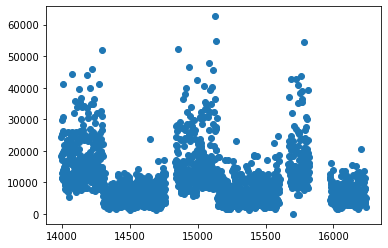

In [116]:
plt.scatter(train[['id']],train[['y']])
plt.show()

In [117]:
trainj1 = train[train['stage'] == 1]
trainj2 = train[train['stage'] == 2]

testj1 = test[test['stage'] == 1]
testj2 = test[test['stage'] == 2]

In [118]:
testj1.columns

Index(['id', 'year', 'stage', 'match', 'home', 'away', 'stadium', 'week_day',
       'month', 'day', 'tv_cnt', 'BS-TBS', 'NHK', '地方局', 'ｽｶﾊﾟｰ', 'home_score',
       'away_score', 'temperature', 'humidity', 'referee', 'home_01',
       'home_02', 'home_03', 'home_04', 'home_05', 'home_06', 'home_07',
       'home_08', 'home_09', 'home_10', 'home_11', 'away_01', 'away_02',
       'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08',
       'away_09', 'away_10', 'away_11', 'weather_晴', 'weather_曇', 'weather_雨',
       'weather_屋内', 'weather_雷', 'weather_雪', 'weather_霧', 'weather_のち',
       'weather_時々', 'weather_一時', 'address', 'capa', 'h_lat', 'h_lng',
       'station', 'age', 'child', 'population', 'area', 'absorp',
       'home_stadium', 'lat', 'lng', 'away_stadium', 'a_lat', 'a_lng',
       'discomfort', 'ranking_x', 'ranking_y', 'home_all', 'away_all',
       'distance', 'jap_cnt', 'home_cum', 'away_cum'],
      dtype='object')

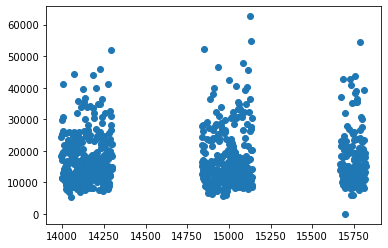

In [119]:
plt.scatter(trainj1[['id']],trainj1[['y']])
plt.show()

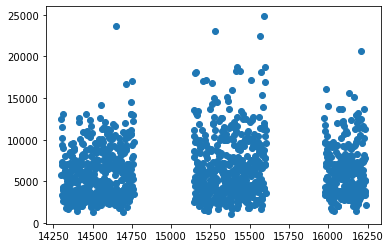

In [120]:
plt.scatter(trainj2[['id']],trainj2[['y']])
plt.show()

In [121]:
trainj1[trainj1['y'] > 50000]

,id,y,year,stage,match,home,away,stadium,week_day,month,...,a_lng,discomfort,ranking_x,ranking_y,home_all,away_all,distance,jap_cnt,home_cum,away_cum
298,14292,51879,2012,1,34,34,21,25,5,12,...,137.170016,44.61924,6.0,5.0,575500000.0,504000000.0,290732.345116,1,5353,3993
784,14852,52293,2013,1,2,34,21,25,5,3,...,137.170016,65.49616,3.0,8.0,553000000.0,360500000.0,290732.345116,0,5786,4226
1059,15127,62632,2013,1,33,31,1,34,5,11,...,139.059359,56.01709,1.0,8.0,755000000.0,249000000.0,209594.043170,1,4315,2548
1066,15134,54905,2013,1,34,34,13,25,5,12,...,135.514626,55.83038,4.0,6.0,583000000.0,207500000.0,478461.470206,0,5786,3213
1654,15787,54350,2014,1,14,34,13,25,5,5,...,135.514626,67.77264,2.0,11.0,568000000.0,599000000.0,478461.470206,6,5854,3771


In [122]:
trainj2[trainj2['y']>20000]

,id,y,year,stage,match,home,away,stadium,week_day,month,...,a_lng,discomfort,ranking_x,ranking_y,home_all,away_all,distance,jap_cnt,home_cum,away_cum
653,14647,23617,2012,2,32,22,18,26,6,9,...,138.584328,76.32428,4.0,1.0,44800000.0,156900000.0,7.933431e+05,1,986,1179
1212,15280,23012,2013,2,13,19,5,10,7,5,...,135.541854,65.54847,1.0,2.0,181500000.0,518500000.0,4.327474e+04,2,1960,2786
1497,15565,22468,2013,2,39,19,20,10,7,11,...,135.715575,67.64982,1.0,3.0,214500000.0,40000000.0,6.644881e+04,1,1960,1930
1525,15593,24813,2013,2,42,7,6,36,6,11,...,130.730906,67.15675,7.0,16.0,27500000.0,37000000.0,1.395273e+06,0,1071,686
1919,16206,20633,2014,2,22,7,22,36,6,7,...,131.656472,71.85624,10.0,12.0,27500000.0,75000000.0,1.344132e+06,0,1328,1006


In [123]:
y = trainj1['y']
x = trainj1.drop(['id','y'],axis=1)

x.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','referee','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11', 'lat','lng','home_score','away_score','year','day','temperature','humidity','stage','station'],axis=1,inplace=True)


ra.xgb_analysis(x,y)

R^2 : 0.724, RMSE : 4031.463


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7,
             eval_metrics=make_scorer(fmean_squared_error, greater_is_better=False),
             gamma=0.9, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, random_state=17, reg_alpha=160, reg_lambda=1,
             scale_pos_weight=1, seed=17, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [124]:
def select_featurevalue(x,y):
    min_rmse =  ra.xgb_analysis2(x,y)
    for col in x.columns:
        a = x.drop([col],axis=1)
        rmse = ra.xgb_analysis2(a,y)

        print(f'col : {col} , rmse : {rmse}')
        if rmse < min_rmse:
            min_rmse = rmse
            x.drop([col],axis=1,inplace = True)
            print(f'col : {col} dropped')

        print(f'min_rmse : {min_rmse}')

In [125]:
# select_featurevalue(x,y)

In [126]:
x.columns

Index(['match', 'home', 'away', 'stadium', 'week_day', 'month', 'tv_cnt',
       'NHK', '地方局', 'weather_晴', 'weather_雨', 'capa', 'h_lat', 'h_lng', 'age',
       'child', 'population', 'area', 'absorp', 'home_stadium', 'away_stadium',
       'a_lat', 'a_lng', 'discomfort', 'ranking_x', 'ranking_y', 'home_all',
       'away_all', 'distance', 'jap_cnt', 'home_cum', 'away_cum'],
      dtype='object')

In [127]:
model = ra.xgb_analysis(x,y)

R^2 : 0.724, RMSE : 4031.463


In [128]:
y = trainj2['y']
x = trainj2.drop(['id','y'],axis=1)

x.drop(['weather_屋内','weather_曇','weather_のち', 'weather_時々', 'weather_一時','weather_霧','weather_雪','weather_雷','ｽｶﾊﾟｰ','BS-TBS','address','referee','home_01', 'home_02','home_03', 'home_04', 'home_05', 'home_06', 'home_07', 'home_08','home_09', 'home_10', 'home_11', 'away_01', 'away_02', 'away_03', 'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09','away_10', 'away_11', 'lat','lng','home_score','away_score','year','day'],axis=1,inplace=True)


ra.xgb_analysis(x,y)

R^2 : 0.729, RMSE : 1799.258


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7,
             eval_metrics=make_scorer(fmean_squared_error, greater_is_better=False),
             gamma=0.9, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=9, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, random_state=17, reg_alpha=160, reg_lambda=1,
             scale_pos_weight=1, seed=17, subsample=0.85, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [129]:
# select_featurevalue(x,y)

In [130]:
x.columns

Index(['stage', 'match', 'home', 'away', 'stadium', 'week_day', 'month',
       'tv_cnt', 'NHK', '地方局', 'temperature', 'humidity', 'weather_晴',
       'weather_雨', 'capa', 'h_lat', 'h_lng', 'station', 'age', 'child',
       'population', 'area', 'absorp', 'home_stadium', 'away_stadium', 'a_lat',
       'a_lng', 'discomfort', 'ranking_x', 'ranking_y', 'home_all', 'away_all',
       'distance', 'jap_cnt', 'home_cum', 'away_cum'],
      dtype='object')

In [131]:
model2 = ra.xgb_analysis(x,y)

R^2 : 0.729, RMSE : 1799.258


In [132]:
result = pd.read_csv('../data/result.csv')

In [133]:
result

,id,y
0,15822,14931
1,15823,16632
2,15824,26494
3,15825,11963
4,15826,24119
...,...,...
346,16432,4842
347,16433,10717
348,16434,3628
349,16435,7799


In [134]:
testj1 = testj1[['id','match', 'home', 'away', 'stadium', 'week_day', 'month', 'tv_cnt',
       'NHK', '地方局', 'weather_晴', 'weather_雨', 'capa', 'h_lat', 'h_lng', 'age',
       'child', 'population', 'area', 'absorp', 'home_stadium', 'away_stadium',
       'a_lat', 'a_lng', 'ranking_x', 'home_all', 'distance', 'jap_cnt',
       'home_cum', 'away_cum']]

testj2 = testj2[['id','match', 'stadium', 'week_day', 'month', 'tv_cnt', 'NHK', '地方局',
       'temperature', 'humidity', 'weather_晴', 'weather_雨', 'capa', 'h_lat',
       'h_lng', 'station', 'age', 'child', 'population', 'area', 'absorp',
       'home_stadium', 'away_stadium', 'ranking_x', 'ranking_y', 'home_all',
       'distance', 'jap_cnt', 'home_cum', 'away_cum']]

In [135]:
tj1 = pd.DataFrame({
    'id':testj1['id'],
    'pred':model.predict(testj1.drop(['id'],axis=1))
})

tj2 = pd.DataFrame({
    'id':testj2['id'],
    'pred':model2.predict(testj2.drop(['id'],axis=1))
})

t = pd.concat([tj1,tj2],axis=1)

ValueError: feature_names mismatch: ['match', 'home', 'away', 'stadium', 'week_day', 'month', 'tv_cnt', 'NHK', '地方局', 'weather_晴', 'weather_雨', 'capa', 'h_lat', 'h_lng', 'age', 'child', 'population', 'area', 'absorp', 'home_stadium', 'away_stadium', 'a_lat', 'a_lng', 'discomfort', 'ranking_x', 'ranking_y', 'home_all', 'away_all', 'distance', 'jap_cnt', 'home_cum', 'away_cum'] ['match', 'home', 'away', 'stadium', 'week_day', 'month', 'tv_cnt', 'NHK', '地方局', 'weather_晴', 'weather_雨', 'capa', 'h_lat', 'h_lng', 'age', 'child', 'population', 'area', 'absorp', 'home_stadium', 'away_stadium', 'a_lat', 'a_lng', 'ranking_x', 'home_all', 'distance', 'jap_cnt', 'home_cum', 'away_cum']
expected away_all, discomfort, ranking_y in input data

In [105]:
t = pd.read_csv('../data/moto/train.csv')

In [106]:
c = pd.read_csv('../data/moto/condition.csv')

In [138]:
pd.read_csv('../data/moto/stadium.csv').sort_values('capa',ascending=False).head()

,name,address,capa
17,日産スタジアム,神奈川県横浜市港北区小机町3300,72327
33,埼玉スタジアム２００２,埼玉県さいたま市緑区中野田500,63700
42,国立競技場,東京都新宿区霞ヶ丘町10,54224
36,エコパスタジアム,静岡県袋井市愛野2300-1,50889
9,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000
